In [83]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import onnxmltools
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import pandas as pd


In [84]:
"""
# Model 1
# source: https://medium.com/geekculture/steganography-and-steganalaysis-with-cnn-9bd738dfed6f
model = Sequential()
model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
"""

#"""
# MODEL 2
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#"""

In [85]:
for layer in model.layers:
    print(layer.input_shape)

(None, 100, 100, 3)
(None, 98, 98, 32)
(None, 49, 49, 32)
(None, 47, 47, 32)
(None, 23, 23, 32)
(None, 16928)
(None, 64)


In [86]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16928)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [87]:
# Loading data
data_dir = './data'
imgs = {}
for image_class in os.listdir(data_dir):
    imgs[image_class] = {}
    for image in os.listdir(os.path.join(data_dir, image_class)):
        im = cv2.imread(os.path.join(data_dir, image_class, image))
        im = cv2.resize(im, (100, 100))
        imgs[image_class][image] = im
imgs['Cover']['00045.jpg'][0]


array([[119, 108, 104],
       [109,  99,  96],
       [122, 114, 109],
       [129, 114, 105],
       [132, 117, 108],
       [134, 120, 109],
       [143, 130, 116],
       [144, 128, 120],
       [151, 131, 120],
       [145, 128, 115],
       [144, 129, 121],
       [123, 108, 103],
       [126, 107, 100],
       [117, 107, 104],
       [148, 125, 108],
       [116,  94,  90],
       [173, 146, 127],
       [171, 144, 123],
       [150, 132, 120],
       [161, 141, 120],
       [136, 118, 108],
       [114, 101,  95],
       [172, 148, 125],
       [166, 142, 120],
       [165, 139, 123],
       [151, 125, 113],
       [167, 146, 121],
       [149, 130, 118],
       [158, 143, 124],
       [154, 135, 119],
       [153, 132, 124],
       [166, 145, 129],
       [170, 144, 128],
       [130, 121, 117],
       [145, 114, 111],
       [177, 153, 129],
       [170, 150, 133],
       [162, 145, 130],
       [144, 122, 120],
       [174, 149, 133],
       [168, 148, 131],
       [161, 138

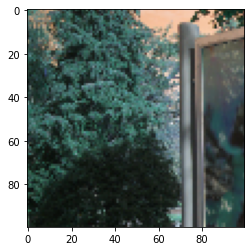

In [88]:
plt.imshow(imgs['Cover']['00001.jpg'])


In [89]:
# Training
size = len(imgs['Cover'])
X = []
Y = []
for img in sorted(imgs['Cover'].keys()):
    img_number = int(img.split('.')[0])
    if img_number < size/2:
        X.append(imgs['Cover'][img])
        Y.append(0)
    else:
        X.append(imgs['JMiPOD'][img])
        Y.append(1)

In [90]:
X = np.array(X).reshape(len(X), 100, 100, 3)
Y = np.array(Y).reshape(len(X), 1)


In [91]:
X.shape

(921, 100, 100, 3)

In [92]:
model.fit(X, Y, epochs = 5, batch_size = 64)


Epoch 1/5
15/15 [==============================] - 12s 628ms/step - loss: 50.6022 - accuracy: 0.4777
Epoch 2/5
15/15 [==============================] - 9s 579ms/step - loss: 0.7033 - accuracy: 0.4832
Epoch 3/5
15/15 [==============================] - 8s 556ms/step - loss: 0.6931 - accuracy: 0.5375
Epoch 4/5
15/15 [==============================] - 8s 511ms/step - loss: 0.6930 - accuracy: 0.5375
Epoch 5/5
15/15 [==============================] - 8s 503ms/step - loss: 0.6928 - accuracy: 0.5375


In [93]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16928)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [94]:
for layer in model.layers:
    print(layer.input_shape)

(None, 100, 100, 3)
(None, 98, 98, 32)
(None, 49, 49, 32)
(None, 47, 47, 32)
(None, 23, 23, 32)
(None, 16928)
(None, 64)


In [95]:
model.save('./model')
onnx_model = onnxmltools.convert_keras(model)
onnxmltools.utils.save_model(onnx_model, './model/model.onnx')


INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets
2022-10-24 22:54:20.855876: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-24 22:54:20.856207: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-10-24 22:54:21.107359: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-24 22:54:21.107608: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


In [96]:
x = np.array(imgs['Cover']['00097.jpg']).reshape(1, 100, 100, 3)
model.predict(x)


1/1 [==============================] - 0s 134ms/step


array([[0.5025736]], dtype=float32)

In [97]:
x = np.array(imgs['JMiPOD']['00096.jpg']).reshape(1, 100, 100, 3)
model.predict(x)

1/1 [==============================] - 0s 46ms/step


array([[0.5025736]], dtype=float32)

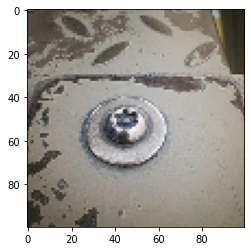

In [98]:
name = '00108.jpg'
x = imgs['Cover'][name]
cv2.imwrite('./ex2.jpg', x)
plt.imshow(x)


In [99]:
x = np.array(x).reshape(1, 100, 100, 3)
model.predict(x)

1/1 [==============================] - 0s 41ms/step


array([[0.5025736]], dtype=float32)

In [100]:
len(imgs['Cover']['00045.jpg'][0][0])

3